<a href="https://colab.research.google.com/github/gulabpatel/Feature_Selection/blob/main/Part%205.2%3A%20FeatureWiz_Interaction_Target_Feature_Engineering_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/AutoViML/featurewiz.git

In [2]:
from featurewiz import featurewiz

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Imported featurewiz. Version = 0.1.22. nrows=None uses all rows. Set nrows=1000 to randomly sample 1000 rows.
outputs = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


In [3]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Feature_Selection/master/adult.csv')
print(dataset.shape)
dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
RANDOM_SEED = 99
target = 'income'
preds = [x for x in list(dataset) if x != target]
len(preds)

14

In [5]:
dataset[target] = dataset[target].astype('category').cat.codes
dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=RANDOM_SEED,)
print(train.shape, test.shape)

(39073, 15) (9769, 15)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (39073, 15)
     Loaded. Shape = (39073, 15)
No special characters in dataset predictors. Now checking target variable...
loading the entire test dataframe - there is no nrows limit applicable #########
    Shape of your Data Set loaded: (9769, 15)
     Loaded test data. Shape = (9769, 15)
No special characters in dataset predictors. Now checking target variable...
Classifying features using a random sample of 10000 rows from dataset.

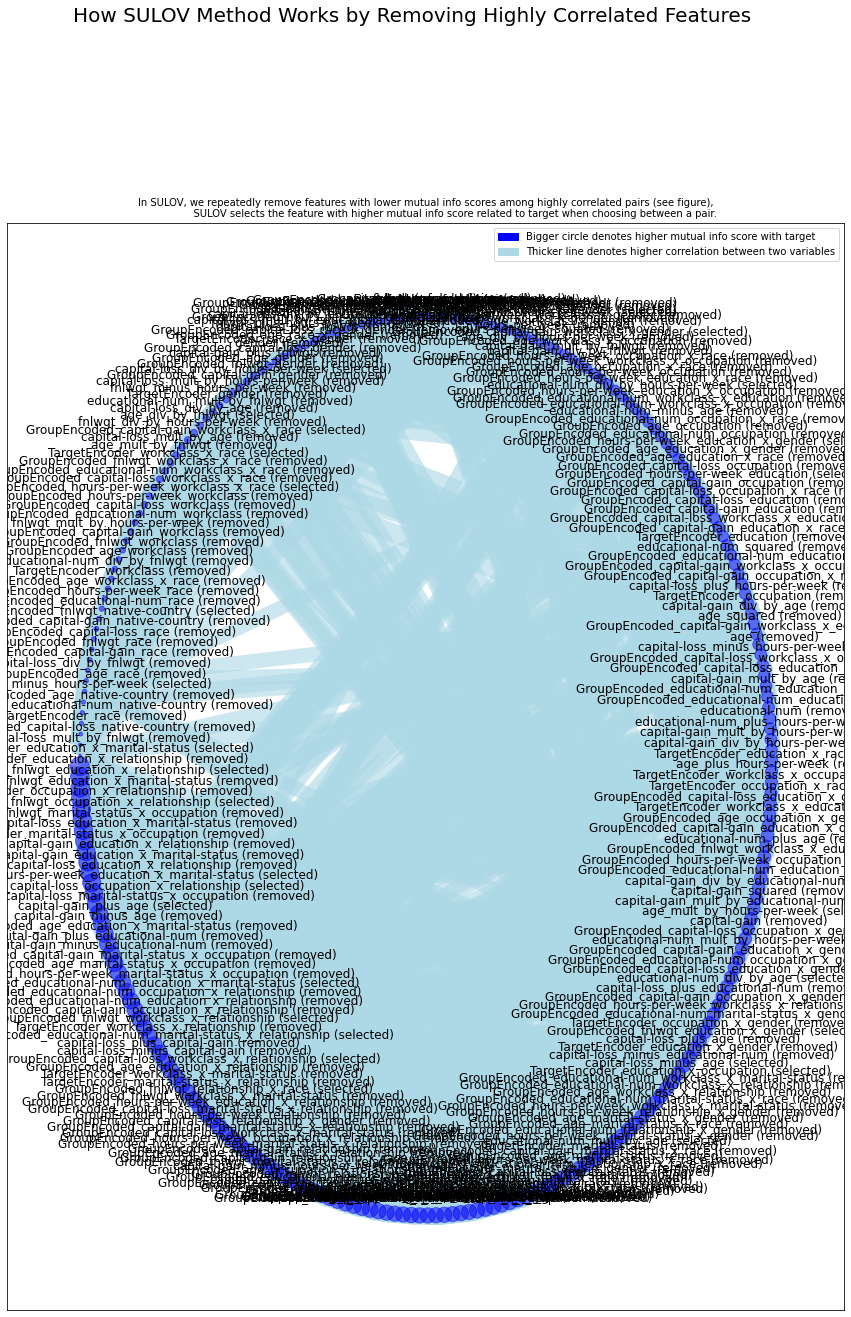

Time taken for SULOV method = 106 seconds
    Adding 28 categorical variables to reduced numeric variables  of 51
Final list of selected vars after SULOV = 79
############## F E A T U R E   S E L E C T I O N  ####################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Since ['groupby', 'target', 'interactions'] category encoding is done, dropping original categorical vars from predictors...
Current number of predictors = 51 
    XGBoost version: 1.5.2
Number of booster rounds = 100
        using 51 variables...
            Time taken for regular XGBoost feature selection = 2 seconds
        using 41 variables...
            Time taken for regular XGBoost feature selection = 3 seconds
        using 31 variables...
            Time taken for regular XGBoost feature selection = 4 seconds
        using 21 variables...
            Time taken for regular XGBoost feature selection = 4 seconds
        using 11 variables...

In [7]:
dft = featurewiz(train, target, corr_limit=0.70,verbose=1, test_data=test,
                      feature_engg=["groupby",'target','interactions'], 
                     category_encoders=''
                     )

In [ ]:
!pip install catboost

In [9]:
from catboost import CatBoostClassifier
RFC = CatBoostClassifier()

In [10]:
from sklearn.ensemble import RandomForestClassifier
cat_vars = train.select_dtypes(include='category').columns.tolist() + train.select_dtypes(include='object').columns.tolist()
train[cat_vars]=train[cat_vars].fillna(train.mode().iloc[0])
RFC.fit(train[preds],train[target], cat_features=cat_vars, metric_period=100)

Learning rate set to 0.049279
0:	learn: 0.6454586	total: 128ms	remaining: 2m 7s
100:	learn: 0.2880471	total: 11.2s	remaining: 1m 39s
200:	learn: 0.2778518	total: 26.4s	remaining: 1m 44s
300:	learn: 0.2691018	total: 40.8s	remaining: 1m 34s
400:	learn: 0.2642187	total: 55.6s	remaining: 1m 22s
500:	learn: 0.2602720	total: 1m 9s	remaining: 1m 8s
600:	learn: 0.2566035	total: 1m 18s	remaining: 52.4s
700:	learn: 0.2537478	total: 1m 25s	remaining: 36.7s
800:	learn: 0.2507020	total: 1m 33s	remaining: 23.1s
900:	learn: 0.2481601	total: 1m 40s	remaining: 11s
999:	learn: 0.2457782	total: 1m 47s	remaining: 0us


In [11]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
test[cat_vars]=test[cat_vars].fillna(train.mode().iloc[0])
print(balanced_accuracy_score(test[target].values, RFC.predict(test[preds])))
accuracy_score(test[target].values, RFC.predict(test[preds]))

0.7939633769195409


0.8742962432183438

In [12]:
trainm, testm = dft
print(trainm.shape, testm.shape)

(39073, 43) (9769, 42)


In [13]:
cat_vars = trainm.select_dtypes(include='category').columns.tolist() + trainm.select_dtypes(include='object').columns.tolist()
trainm[cat_vars]=trainm[cat_vars].fillna(trainm.mean().iloc[0])
feats = [x for x in list(trainm) if x not in [target]]
len(feats)

42

In [14]:
RFC = CatBoostClassifier()
RFC.fit(trainm[feats],trainm[target], cat_features=cat_vars, metric_period=100)

Learning rate set to 0.049279
0:	learn: 0.6424188	total: 20.8ms	remaining: 20.8s
100:	learn: 0.2879555	total: 2.57s	remaining: 22.9s
200:	learn: 0.2743952	total: 4.67s	remaining: 18.6s
300:	learn: 0.2625592	total: 7.03s	remaining: 16.3s
400:	learn: 0.2542352	total: 11.4s	remaining: 17.1s
500:	learn: 0.2473507	total: 16.1s	remaining: 16s
600:	learn: 0.2409726	total: 21.6s	remaining: 14.4s
700:	learn: 0.2350053	total: 26.9s	remaining: 11.5s
800:	learn: 0.2297073	total: 31.6s	remaining: 7.86s
900:	learn: 0.2248014	total: 36.1s	remaining: 3.97s
999:	learn: 0.2200215	total: 40.9s	remaining: 0us


In [15]:
testm[cat_vars]=testm[cat_vars].fillna(trainm.mean().iloc[0])

In [16]:
print(balanced_accuracy_score(test[target].values, RFC.predict(testm[feats])))
accuracy_score(test[target].values, RFC.predict(testm[feats]))

0.7066034930412206


0.8451223257242297